In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
db = pd.read_csv('studentadmission.csv');
db

,score,admitted
0,63,yes
1,65,yes
2,70,yes
3,71,yes
4,53,no
5,12,no
6,54,yes
7,52,no
8,25,no
9,31,no


In [3]:
# Encoding the admitted (target variabel)

# Yes ---> 1
# No ----> 0

label = []
j = 0
for i in db['admitted']:
    print(i)
    
    if i == 'yes':
        label.append(1)
    else:
        label.append(0)
        
    j = j + 1
    
db['label'] = label    

yes
yes
yes
yes
no
no
yes
no
no
no
no
no
no


In [4]:
en_db = db[['score', 'label']]

In [5]:
db
# en_db

,score,admitted,label
0,63,yes,1
1,65,yes,1
2,70,yes,1
3,71,yes,1
4,53,no,0
5,12,no,0
6,54,yes,1
7,52,no,0
8,25,no,0
9,31,no,0


In [6]:
# # en_db.columns = ["", ""]

# x_data = en_db.iloc[:,:1]

# labels = en_db.iloc[:,1:2]

# labels

# en_db.columns = ["", ""]

x_data = db.score.to_numpy()

labels = db.label.to_numpy()

x_data = x_data.reshape(-1, 1)

x_data

# type(x_data)

array([[63],
       [65],
       [70],
       [71],
       [53],
       [12],
       [54],
       [52],
       [25],
       [31],
       [32],
       [40],
       [50]], dtype=int64)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.2
                                                    , random_state = 0)

In [8]:
model = LogisticRegression(solver = "liblinear", random_state = 0)

H = model.fit(x_train, y_train)

In [9]:
print("Logistic Regression Model Intercept (m): ", model.intercept_)

print("Logistic Regression Model Coefficient (c): ", model.coef_)

Logistic Regression Model Intercept (m):  [-1.17908119]
Logistic Regression Model Coefficient (c):  [[0.02657666]]


In [10]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[1 0 1]
[1 0 0]


In [11]:
for i in y_predict:
    
    if i == 1:
        print("Yes")
    else:
       print("No")

Yes
No
Yes


Text(0.5, 1.0, 'Logistic Regression Model')

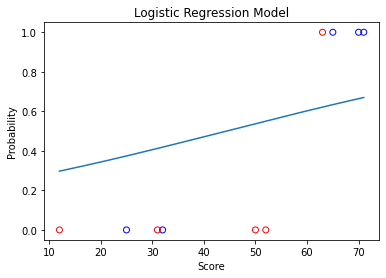

In [12]:
# Scatter plot for Logistic Regression Model

colors = {0:'red', 1:'blue'}
def sigmoid(x):
    return (1 / (1 +np.exp(-(model.intercept_[0] +(model.coef_[0][0] * x)))))
x1 = np.arange(np.min(x_train), np.max(x_train), 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x_train,y_train,facecolors='none',edgecolors=pd.DataFrame(labels)[0].apply(lambda x_train:colors[x_train]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title('Logistic Regression Model')

In [13]:
x_train

array([[32],
       [70],
       [25],
       [65],
       [52],
       [31],
       [71],
       [63],
       [12],
       [50]], dtype=int64)

In [14]:
# Evaluate the Model

print("\nPrediction Probability : \n",model.predict_proba(x_test))

print("\nPrediction : ",model.predict(x_test))

print("\nScore : ",model.score(x_test, y_test))


Prediction Probability : 
 [[0.43633294 0.56366706]
 [0.52897126 0.47102874]
 [0.44288007 0.55711993]]

Prediction :  [1 0 1]

Score :  0.6666666666666666


In [15]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(x_test)))


Confusion Matrix : 
 [[1 1]
 [0 1]]


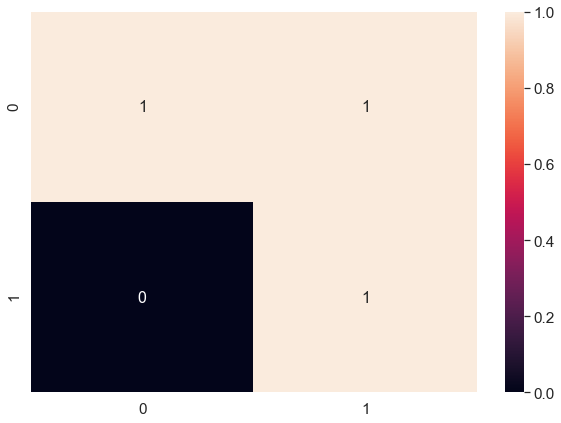

In [16]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(x_test))

import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [17]:
# Print Classification Report

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [21]:
prediction = model.predict([[49]])

if prediction == 1:
    print("Yes")
else:
    print("No")

Yes
